# Module 2 Lab - Probability - Solution

In [1]:
% matplotlib inline

This will make all the `matplotlib` images appear in the notebook.

## Directions

**Failure to follow the directions will result in a "0"**

The due dates for each are indicated in the Syllabus and the course calendar. If anything is unclear, please email EN605.448@gmail.com the official email for the course or ask questions in the Lab discussion area on Blackboard.

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

### General Instructions

1.  You will be submitting your assignment to Blackboard. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. It should say `In [1]` for the first codecell and increase by 1 throughout.

In [2]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

## Manipulating and Interpreting Probability

Given the following *joint probability distribution*, $P(A|B)$, for $A$ and $B$,


|    | a1   | a2   |
|----|------|------|
| **b1** | 0.37 | 0.16 |
| **b2** | 0.23 | ?    |

Answer the following questions.

**1\. What is $P(A=a2, B=b2)$?**

All probability distributions sum to 1. If we take 1 and subtract out the probabilities for the events we do know about, we'll find the probability for the one event we don't know: 1 - 0.37 - 0.16 - 0.23 = ?

In [3]:
print( "the probability of (a2, b2) is %.2f" % (1 - 0.37 - 0.16 - 0.23))

the probability of (a2, b2) is 0.24


**2\. If I observe events from this probability distribution, what is the probability of seeing (a1, b1) then (a2, b2)?**

Note that the two observations are independent. Remember the definition of independence: $P((a2,b2)|(a1,b1) = P((a2,b2))$ which means that observing the first event does not give me any additional information about the probability of the second event (it does not change how uncertain I am about (a2, b2) happening by modifying the base or *prior* probability).

This does not mean, however, that A and B are independent; we're talking about the *joint* event and the *joint* probability.

The probability of two independent events is the productive of their individual probabilities:

In [4]:
print( "the probability of (a1, b1) then (a2, b2) is %.2f" % (0.37 * 0.24))

the probability of (a1, b1) then (a2, b2) is 0.09


**3\. Calculate the marginal probability distribution, $P(A)$.**

There are any number of ways of doing this but we need to figure out some way to represent discrete probability distributions as data structures. I propose we represent our probility distribution(s) as a set of nested Dicts:

In [5]:
p = {"a1": {"b1": 0.37, "b2": 0.23}, "a2": {"b1": 0.16, "b2": 0.24}}

$P(A)$ is basically marginalizing B *out*. We can do this by summing the individual elements:

In [6]:
print( "P(a1) = %.2f" % (p["a1"]["b1"] + p["a1"]["b2"]))
print( "P(a2) = %.2f" % (p["a2"]["b1"] + p["a2"]["b2"]))

P(a1) = 0.60
P(a2) = 0.40


**4\. Calculate the marginal probability distribution, $P(B)$.**

We can do the same thing we just did except we will marginalize out A:

In [7]:
print( "P(b1) = %.2f" % (p["a1"]["b1"] + p["a2"]["b1"]))
print( "P(b2) = %.2f" % (p["a1"]["b2"] + p["a2"]["b2"]))

P(b1) = 0.53
P(b2) = 0.47


**5\. Calculate the conditional probability distribution, $P(A|B)$.**

The calculation of a conditional probability for A creates a new probability distribution for each event in B. That is, instead of wanting to know $P(a1, b1)$ or $P(a2, b1)$, we want to know $P(a1|b1)$ and $P(a2|b1)$. Remember, conditional probability expresses the idea "if we know that b1 happened, how does this change the probabilities of a1, a2, etc.". We then do this for each possible value of B.

The formula for conditional probability is:

$$P(A|B) = \frac{P(A, B)}{P(B)}$$

In [8]:
print( "P(a1|b1) = %.2f" % ((p["a1"]["b1"])/(p["a1"]["b1"] + p["a2"]["b1"])))
print( "P(a2|b1) = %.2f" % ((p["a2"]["b1"])/(p["a1"]["b1"] + p["a2"]["b1"])))
print( "-----")
print( "P(a1|b2) = %.2f" % ((p["a1"]["b2"])/(p["a1"]["b2"] + p["a2"]["b2"])))
print( "P(a2|b2) = %.2f" % ((p["a2"]["b2"])/(p["a1"]["b2"] + p["a2"]["b2"])))

P(a1|b1) = 0.70
P(a2|b1) = 0.30
-----
P(a1|b2) = 0.49
P(a2|b2) = 0.51


**6\. Calculate the conditional probability distribution, $P(B|A)$.**

Basically the same principle applies here as well:

In [9]:
print( "P(b1|a1) = %.2f" % ((p["a1"]["b1"])/(p["a1"]["b1"] + p["a1"]["b2"])))
print( "P(b2|a1) = %.2f" % ((p["a1"]["b2"])/(p["a1"]["b1"] + p["a1"]["b2"])))
print( "-----")
print( "P(b1|a2) = %.2f" % ((p["a2"]["b1"])/(p["a2"]["b1"] + p["a2"]["b2"])))
print( "P(b2|a2) = %.2f" % ((p["a2"]["b2"])/(p["a2"]["b1"] + p["a2"]["b2"])))

P(b1|a1) = 0.62
P(b2|a1) = 0.38
-----
P(b1|a2) = 0.40
P(b2|a2) = 0.60


**7\. Does $P(A|B) = P(B|A)$? What do we call the belief that these are always equal?**

This question can potentially be a bit confusing because if you look at the *table* that each of these represents, they don't exactly line up. What is we are really asking is if $P(a1|b1)$ is equal to $P(b1|a1)$, etc.

By looking at the two sets of results, we can see that they are definitely not equal. P(a1|b1) = 0.62 and P(b1|a1) = 0.70, P(a1|b2) = 0.4 and P(b2|a1) = 0.3.

The belief that these are always equal is the **inverse probability fallacy**.

**8\. Does $P(A) = P(A|B)$? What does that mean about the independence of $A$ and $B$?**

No, they do not. P(a1) = 0.53 and P(a1|b1) = 0.62. This means that A and B are not independent. 

You can test your understanding by creating a joint probability P(A, B) where they are independent. Start with A and B as two flips of a fair coin and then try to come up with a more interesting example.

**9\. Using $P(A)$, $P(B|A)$, $P(B)$ from above, calculate,**

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

Does it match your previous calculation for $P(A|B)$?

We only really need to do one of these:

$$P(a1|b1) = \frac{P(b1|a1)P(a1)}{P(b1)}$$

In [10]:
print( "P(a1|b1) = %.2f" % (((p["a1"]["b1"])/(p["a1"]["b1"] + p["a1"]["b2"])*(p["a1"]["b1"] + p["a1"]["b2"]))/(p["a1"]["b1"] + p["a2"]["b1"])))

P(a1|b1) = 0.70


which is the same. It isn't magic. If you go through the code above, you'll see that everything pretty much well cancels out as you'd expect.

**10\. If we let A = H (some condition, characteristic, hypothesis) and B = D (some data, evidence, a test result), then how do we interpret each of the following: $P(H)$, $P(D)$, $P(H|D)$, $P(D|H)$, $P(H, D)$?**

$P(H)$ - prior distribution (prior probability of the hypothesis)

$P(D)$ - probability of the data

$P(H|D)$ - posterior distribution (posterior probability of the hypothesis)

$P(D|H)$ - likelihood (probability of the data given the hypothesis)

## Generating Samples from Probability Distributions

A key component of the Labs throughout the semester will be the generation of synthetic data with particular properties. The next questions introduce you to this technique in the form of random numbers and mathematical distributions.

### Reproducible Random Numbers

Before you begin working with random numbers in any situation, in Data Science, as opposed to Machine Learning, it is desirable to set the random seed and record it. We do this for several reasons:

1. For reproducible research, we need to record the random seed that was used to generate our results.
2. For sharing with others, if our text said there was some result, and the user re-runs the notebook, we want to get the same results.
3. If we are creating a model, and we accidentally generate the best model ever, we want to be able to build it again.

Although Python has *some* random number generators, we will be using `NumPy`'s random number generators throughout the course because it has a broader range of distributions.

```
np.random.seed(N) # Numpy library
```

You have several options for setting the seed:

* Just come up with a number, some integer, like: 27192759.
* Run:

```
    int( time.time())
```

to print out a value you can use in either case. Do not just feed `int( time.time())` into the seed function. The whole point is to make the seed a constant. Numpy has ample documentation on its [random module](https://docs.scipy.org/doc/numpy/reference/routines.random.html).

Here's an example:

In [11]:
int( time.time())

1505226285

In [12]:
np.random.seed([1482004723]) # note the use of a number iside a list.

Note that the two above don't match. They did the very first time I ran the notebook but they don't now because I've had to re-run the notebook several times. This is, in fact, the point. In fact, in general, once you execute `int( time.time())` to get your seed, you can just delete the cell or just make up a seed. I like to use my birthday: YYYYMMDD and variations of other dates.

In [13]:
np.random.rand(10)
# do some stuff

array([ 0.37677145,  0.43518392,  0.71651458,  0.54653675,  0.98604431,
        0.45821284,  0.27999283,  0.03121421,  0.14613549,  0.10168693])

In [14]:
np.random.rand( 10)
# do more stuff

array([ 0.38032926,  0.60617514,  0.63969352,  0.52414294,  0.53436926,
        0.05148294,  0.75952124,  0.44076097,  0.76423589,  0.52040212])

In [15]:
np.random.seed([1482004723])

In [16]:
np.random.rand(10)
# do some stuff

array([ 0.37677145,  0.43518392,  0.71651458,  0.54653675,  0.98604431,
        0.45821284,  0.27999283,  0.03121421,  0.14613549,  0.10168693])

There are a few things to note here:

1. We asked what time it was to get the seed but we did not put it directionly into `np.random.seed()`.
2. The argument to `np.random.seed()` must be a List.
3. We set the seed then got 10 random numbers by calling `np.random.rand(10)`. In practice, this might just be all we want to do (get numbers from the distribution) or we may want to do more calculations.
4. We get 10 more random numbers by calling `np.random.rand( 10)`. Notice that these are not the same as the first call. You can think of `random` *in general* as generating a stream of random numbers according to some distribution which we just tap into. We get the first 10, the next 10, the next 25, etc.
5. We set the random seed to the same random seed as before.
6. We got the same first 10 random numbers. This demonstrates that setting the seed "resets" the stream of random numbers. This is what we want.

In general, before answering each question, we are going to want to set the random seed to some value. Do not do it inside a function that is getting called over and over again, set it at the start of the experiment.

We will talk a lot more about visualization later but for right now I'm going to introduce the *histogram*. A histogram is a means for visualizing the probability distribution of a continuous variable.

Consider the following problem. I want to generate 100 data points on the range (-5.0, 10.0) that are from a *uniform distribution*. How do I do this?

1. I set the random seed.
2. I look through the documentation to see if there is a function that will generate the data directly or via a *transformation*.
3. I then visualize the data I generated.

Let's do that:

In [17]:
int( time.time())

1505226285

In [18]:
np.random.seed([1482003424])

Looking at the documentation, there is a function `uniform` that takes *low*, *high* and *size* arguments. Let's do it that way first. I'm going to arbitrarily look at the first 20 values just to see what I got:

In [19]:
xs = np.random.uniform(-5.0, 10.0, 100)
print( xs[0:20])

[ 6.42438573 -3.22910746 -1.51821304 -3.87133369 -0.81487703  6.3629005
  8.50156041  4.86376343 -2.84230612  2.52226997  9.06166161  1.64070685
 -2.2239334   5.66352015  2.11413729 -3.75793272  3.8597046   5.83393762
 -3.78916267 -3.62696669]


Then I'm going to plot the data. I'm not going to talk about plotting at all until a future model so this is the bare basic code you need to know:

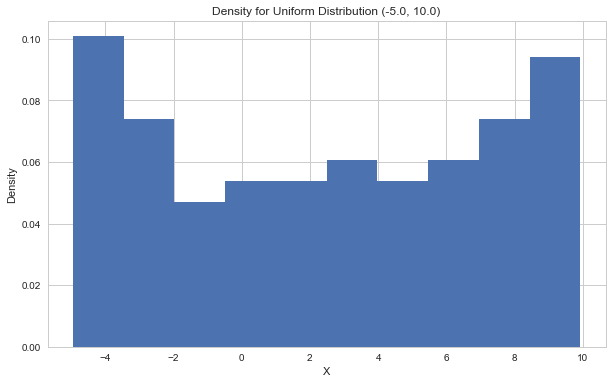

In [20]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist( xs, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "X")
axes.set_title( "Density for Uniform Distribution (-5.0, 10.0)")

plt.show()

I'm also going to explore the data a little bit. I used the parameters *low* and *high* to generate the data. What values did I get back?

In [21]:
print( "low =", min( xs))
print( "high=", max( xs))

low = -4.94870493414
high= 9.9242382066


Now, what if `uniform` hadn't existed? I would have had to have used `random` which generates uniformly distributed random numbers on the range (0, 1) and projected it into the range (-5.0, 10.0):

In [22]:
np.random.seed([1482003424])
xs = np.random.random(100) * 15.0 - 5.0
print( xs[0:20])
print( "low =", min( xs))
print( "high=", max( xs))

[ 6.42438573 -3.22910746 -1.51821304 -3.87133369 -0.81487703  6.3629005
  8.50156041  4.86376343 -2.84230612  2.52226997  9.06166161  1.64070685
 -2.2239334   5.66352015  2.11413729 -3.75793272  3.8597046   5.83393762
 -3.78916267 -3.62696669]
low = -4.94870493414
high= 9.9242382066


Note that this is a *new* experiment so I set the random seed. However, I specifically wanted to see if the two different methods generated the same random numbers (they do) so I set it the same random seed. In general, each experiment will have a different random seed.

### Exercises

Follow the directions for Lab Discussions and Questions.

**1\. A  coin has a probability of heads, $\theta=0.67$. Simulate 25 events (coin tosses) from this Bernoulli Distribution (25 Bernoulli *Trials*).**

1. Set the random seed.
2. Generate the samples, `x`. (There may be multiple ways to do this).
3. Calculate the average `np.mean( x)` to get the estimate of $\theta$ (it's a Python trick). How close are you?

** Step 1\.** Set the seed:

In [23]:
np.random.seed([125]) # made this up.

** Step 2\.** Calculate the data. We can use $\theta$ as a threshold value against a uniformly distributed variable on the range (0, 1) to simulate a Bernoulli trial. We indicate 1 for success and 0 for failure. This is a "roll your own" method using a *List Comprehension*.

In [24]:
theta = 0.67
xs = [1 if np.random.random() < theta else 0 for _ in range( 25)]

**Step 3\.** By taking the average, we calculate the proportion of successes, $\hat{\theta}$, which we can compare to the $\theta$ we started with:

In [25]:
mean = np.mean( xs)
print( "mean =", mean)
print( "mean/theta =", mean/theta)

mean = 0.72
mean/theta = 1.07462686567


Not very close (0.72/0.67) is more than 7% higher than it "really" was. We'll see in the next Module what this means and how to bound our estimates.

The **mean** is a measure of central tendency (one of several possible "averages" you can calculate including the median and mode). Given a List of values (or numpy array), `np.mean()` will calculate the mean of that List.

The **variance** measures the dispersion of the values. A high variance is high dispersion and low variance is low dispersion. Thinking about variance is often problematic because the units are the *square* of whatever units the values are in. For example, if the values (data) are in "feet" then variance is "square feet". The square root of the variance is the **standard deviation**. The standard deviation has the same units as the mean.

Even though the units are the same, it's still often difficult to conceive of how much deviation an observed standard deviation actually is. The **coefficient of variation**, $v$, is a dimensionless measure of the variability of a distribution. It allows you to compare how disperse two or more distributions might be, even if their means and **standard deviation**s are in completely different units. 

The definition is:

$v = |\frac{\sigma}{\mu}|$

Basically, it's just the standard deviation as a percent of the mean. It is undefined if the mean is zero. With a little algebra, you can also calculate a desired *standard deviation* given a coefficient of variation. That is, if you have a mean of 12.1 and want about 2.3% variability, you can reverse engineer the standard deviation that would be associated with it. This is important because the random functions for the normal distribution take the mean and standard deviation...not the coefficient of variation. **Do not confuse the coefficient of variation and the variance...they are completely different things.**

Using the appropriate Numpy libraries and functions (or lecture materials),

** Working with the Normal Distribution.**

**2\. $\mu=32.5$ and $v=0.01$ (1%).**

1. Set the random seed.
2. Find the function for the normal distribution in the NumPy documentation.
3. Generate **25** samples for $x$ from a normal distribution with $\mu=32.5$ and $v=0.01$ (1%). 
4. Plot a histogram of the data (change the labels!)
5. Calculate the mean value of $x$.
6. How far off is the mean you calculate from the $\mu$ you started off with (in percent)?

**Step 1\.** Set the random seed:

In [26]:
np.random.seed([12873])

**Step 2\.** Looking in the documentation for NumPy, the function that creates random numbers from the normal distribution is:

`normal([loc, scale, size])`

where loc = mu, scale = standard deviation.

**Step 3\.** Let's make a function to translate mu and v into s (standard deviation) and then use the function to create 25 samples from a normal distribution with the specified parameters. We're going to print out 20 just to get a sense of the data:

In [27]:
def to_std( mu, v):
    return mu * v

mu = 32.5
v = 0.01
s = to_std( mu, v)
xs = np.random.normal( mu, s, 25)
print(xs[0:20])

[ 32.59396246  32.55047946  32.74616382  32.10882515  31.89728886
  32.4131988   32.22917489  32.37756642  32.04337818  32.81159913
  33.21456123  32.96110348  32.62581775  32.97797022  32.71794508
  32.53077859  32.58686424  32.28912607  32.54937358  32.18383262]


**Step 4\.** Plot the data we just generated.

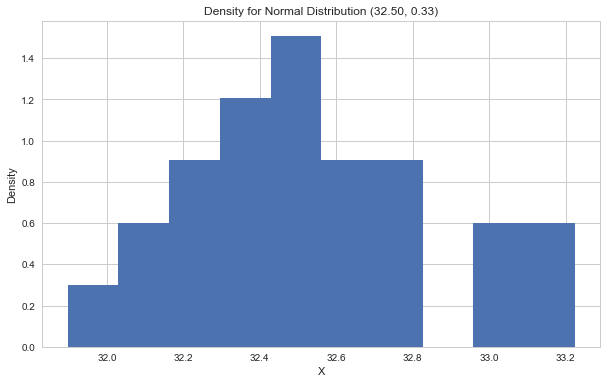

In [28]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist( xs, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "X")
axes.set_title( "Density for Normal Distribution (%0.2f, %0.2f)" % ( mu, s))

plt.show()

It looks normally distributed, kind of.

**Step 5\.** Print out the mean using `np.mean(xs)`:

In [29]:
x_bar = np.mean( xs)
print( "sample mean =", x_bar)

sample mean = 32.5294712002


**Step 6\.** Calculate the discrepancy:

In [30]:
print( "discrepancy =", x_bar/mu)

discrepancy = 1.00090680616


The discrepancy isn't very much with the amount of variability we used (1% of the mean).

Now, one of the problems with this experiment is that we only run it once. We might run it and the mean will only be 1% off and we might run it again (with a different seed) and the results are 10% off.

**3\. Rerunning experiments **

1. Set the random seed.
2. Write a function that generates m samples of `x`, `n` times, calculating the mean for each sample and returns a List of those means. Execute the function with m = 25, n = 100, and the mu and v from Question 2.
3. Plot a histogram of the data.
4. Calculate the low, high and mean value of the data and discuss.

**Step 1\.** Set the random seed:

In [31]:
np.random.seed([3841765259])

**Step 2\.** Write a function that will run the previous experiment multiple times. mu is the mean, v is the coefficient of variation, m is the number of samples, n is the number of trials.

In [32]:
def repeat_random_normal( mu, v, m, n,):
    result = []
    for i in range( n):
        s = to_std( mu, v)
        xs = np.random.normal( mu, s, m)
        x_bar = np.mean( xs)
        result.append( x_bar)
    return result

In [33]:
mu = 32.5
v = 0.01
m = 25
n = 100

s = to_std( mu, v)
xs = repeat_random_normal( mu, v, 25, 100)

**Step 3\.** Plot a histogram of the data:

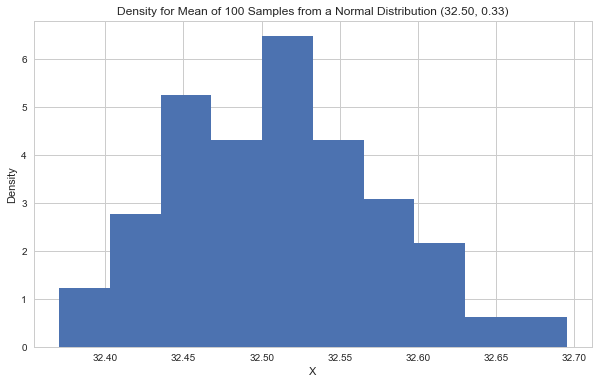

In [34]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist( xs, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "X")
axes.set_title( "Density for Mean of %d Samples from a Normal Distribution (%0.2f, %0.2f)" % ( n, mu, s))

plt.show()

**Step 4\.** Calculate the low, high and mean of the data and discuss.

In [35]:
print( "low =", np.min( xs))
print( "mean =", np.mean( xs))
print( "high =", np.max( xs))

low = 32.3705429016
mean = 32.5094918825
high = 32.6950846605


Again we can see that the range of means calculated from the data match the actual mean (mu) very well. This depends mostly on the fact that the variability is so low.

** Other Distributions**

As we saw in the chapter "Mathematical Distributions", while the normal distribution is parameterized by the mean and variance (standard deviation), other distributions are not. Still, the mean is the first moment and the variance is the second moment of any distribution. Statistical packages and libraries will routinely spit out mean and variance regardless of the actual underlying distribution.

Througout the book, I gave formulas for using the Method of Moments to estimate parameter values. Now we're going to put that to good use.

**4\. Exponentional Distribution**

Using Wikipedia and the Numpy/Scipy Documentation, generate 25 samples from the Exponential Distribution using the same parameters values at Problem 2. However, you will need to convert the values there into the right parameters for the exponential distribution using the Method of Moments described in the text.

Make sure when you calculate the mean from the data, you convert *that* to the rate parameter as well.

**Step 1\.** Set random seed:

In [36]:
np.random.seed([13579])

** Step 2\.** Find the function in the documentation:

`exponential(scale=1.0, size=None)`

The scale is = 1/rate. Since we have the rate as 1/scale, we can use $\mu$ directly. The standard deviation is not used.

**Step 3\.** Generate samples.

In [37]:
mu = 32.5
xs = np.random.exponential( mu, 25)

** Step 4\.** Plot the data. Even though we used $\mu$, we're going to show $\lambda$:

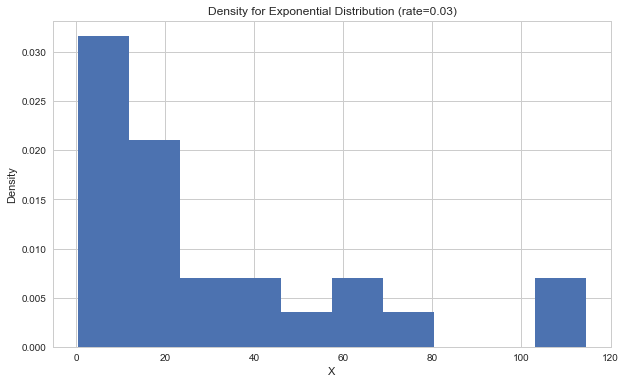

In [38]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist( xs, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "X")
axes.set_title( "Density for Exponential Distribution (rate=%0.2f)" % (1/mu))

plt.show()

** Step 5\.** Print out the mean (the first moment) although we're really interested in the rate parameter, $\lambda$:

In [39]:
mean = np.mean( xs)
rate = 1/mean

print( "mean =", mean)
print( "rate =", rate)

mean = 30.4648008294
rate = 0.0328247673634


**Step 6\.** How far off is the mean you calculate from the $\mu$ you started off with (in percent)?

In [40]:
print( "discrepancy =", mean/mu)

discrepancy = 0.93737848706


The discrepancy is about 10% which is quite a bit bigger than when we used the same number to parameterize a normal distribution.

**5\. Gamma Distribution**

Using Wikipedia and the Numpy Documentation, generate 25 samples from the Gamma Distribution using the same parameters as Problem 2. Use Method of Moments to convert the mean and standard deviation/variance into the parameters of the gamma distribution. (You will have to find it yourself).

**Step 1\.** Set random seed.

In [41]:
np.random.seed([683920])

** Step 2\.** Find the function in the documentation. 

The function from the documentation is here:

`gamma(shape, scale=1.0, size=None)¶`

I found the formula for the Method of Moments estimators [here](http://www.itl.nist.gov/div898/handbook/eda/section3/eda366b.htm). They are:

$$\gamma = (\frac{\sigma}{\mu})^2$$

$$\beta = \frac{\sigma^2}{\mu}$$

The description for the Gamma Distribution defines the parameters $\gamma$ as the shape parameter and $\beta$ as the scale parameter.

**Step 3\.** Generate samples.

In [42]:
mu = 32.5
v = 0.01
s = to_std( mu, v)
gamma = (mu/s)**2
beta = (s**2/mu)

xs = np.random.gamma( gamma, beta, 25)
print( xs[0:20])

[ 32.09316514  32.54489771  32.3690439   32.26440996  32.97763059
  32.44208009  32.92362969  32.39748714  32.80287017  33.1303675
  32.56584326  32.36231413  32.52895262  33.17594745  32.26200196
  32.33554741  32.31893531  32.15532476  32.69844167  32.19313578]


** Step 4\.** Plot the data.

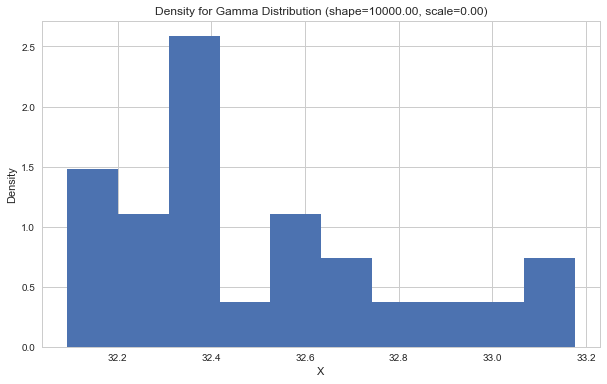

In [43]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist( xs, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "X")
axes.set_title( "Density for Gamma Distribution (shape=%0.2f, scale=%0.2f)" % (gamma, beta))

plt.show()

** Step 5\.** Print out the mean.

In [44]:
mean = np.mean( xs)
s_est = np.std( xs)

gamma_est = (mean/s_est)**2
beta_est = (s_est**2/mean)

print( "gamma =", gamma_est)
print( "beta =", beta_est)

gamma = 11652.2228065
beta = 0.00278858503099


**Step 6\.** How far off is the mean you calculate from the $\mu$ you started off with (in percent)?

In [45]:
print( "gamma discrepancy (est/actual) =", gamma_est/gamma)
print( "beta discrepancy (est/actual) =", beta_est/beta)

gamma discrepancy (est/actual) = 1.16522228065
beta discrepancy (est/actual) = 0.858026163382


We're off by quite a bit. The gamma estimate is almost 17% larger and the beta is almost 15% smaller.

## Lab Discussion

**6\. From a Systems/Complexity Theory perspective, how might we interpret the variability of a factor like `x`? What might it mean if the variability is low or high? (Why doesn't x just have one value...why does it vary at all?)**

From Systems Theory (especially Causal Loop Diagrams), we know that we can build pretty complicated models of how the variables in our domain interact both positively and negatively and how they may balance or reinforce each other. We concede that most of the time, we simply cannot get all the relevant data for the domain we want to understand in order to solve whatever our problem is (remember the "CoNVO").

Now, each observation of $x$ may either be an observation of the *single* system at different *times* (like looking at the economy each month) or observations of many copies of the same system at the same time (like looking at a bunch of people). In either case, the system will be in different states. In the first case because maybe the economy grew, there was a technological innovation (if we modeled it), or there was a natural disaster. In the second case, because all the different copies of the system have different histories and environments. Not to harp on height, but each person may be a different height because of genetics, gene expression, and access to food and types of food throughout their lifetimes so far, and then their age (because we--hopefully--grow as we grow up and--unfortunately--shrink when we age).

Now the *dispersion* may be due to a wide number of factors. We are trying to model a complex system with a single distribution. There may be many factors with small effects that cause the dispersion to be large or there may be a few factors with large effects that cause the dispersion to be large.

Sometimes this is all we can do (a simple Statistical Model) but sometimes we can build better models (which we'll do later in the semester).

## On Your Own

**Each Lab will include an "On Your Own" Section. You will get the most out of the class and understand the concepts better if you attempt to do some of the "On Your Own" problems. Although they are not required, concepts they embody may find their way into the Problem Sets.**

There is a ton of exploration you can do on your own, just with the normal distribution:

1. Using the code from Problem 2, increase the coefficient of variation to the extent that your estimate of the mean is at least 10% off.
2. Now increase the number samples generated using that parameterization, until the estimate of the mean is no more than 1% off.
3. Explore other distributions, learn where they generally show up, find the Method of Moments estimators for their parameters.
4. Combine variables. For example, imagine a system where have two related variables, $x_1$ and $x_2$, $x_1$ is generated from a Bernoulli distribution and $x_2$ is generated from a normal distribution but with different parameters depending on the value of $x_1$. Think about the two means $\mu_1$ and $\mu_2$ and the two coefficients of variation $v_1$ and $v_2$, starting with values of the mean close together and with large variance, how would those parameters have to change before you could see that there were two distinct distribution?

